In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('app_train.csv')
#print(data.head(100))

In [3]:
test = pd.read_csv('app_test.csv')

In [4]:
dropArray = [
#     'SK_ID_CURR',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY',
#     'AMT_CREDIT',
    'DAYS_EMPLOYED',
    'DAYS_BIRTH',
    'AMT_INCOME_TOTAL',
    'REGION_RATING_CLIENT',
    'TOTALAREA_MODE',
    'LIVINGAREA_AVG',
    'LIVINGAREA_MEDI',
    'BASEMENTAREA_AVG',
    'BASEMENTAREA_MODE',
    'REG_CITY_NOT_LIVE_CITY',
    'APARTMENTS_MODE',
    'APARTMENTS_MEDI',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'LIVINGAPARTMENTS_MODE',
    'APARTMENTS_AVG',
    'FLOORSMAX_AVG',
    'LIVINGAPARTMENTS_MEDI',
    'bureau_DAYS_CREDIT_MED',
    'bureau_DAYS_CREDIT_MAX',
    'bureau_DAYS_CREDIT_MIN',
    'bureau_AMT_CREDIT_MAX_OVERDUE_MAX',
    'bureau_AMT_CREDIT_MAX_OVERDUE_MED',
    'bureau_AMT_CREDIT_SUM_OVERDUE_MAX',
    'bureau_AMT_CREDIT_SUM_OVERDUE_MED',
    'bureau_CREDIT_DAY_OVERDUE_MAX',
    'bureau_DAYS_ENDDATE_FACT_MED',
    'bureau_DAYS_ENDDATE_FACT_MAX',
    'bureau_DAYS_ENDDATE_FACT_MIN',
    'bureau_DAYS_CREDIT_ENDDATE_MEAN',
    'bureau_DAYS_CREDIT_ENDDATE_MAX',
    'bureau_DAYS_CREDIT_ENDDATE_MIN',
    'bureau_AMT_CREDIT_SUM_MAX',
    'bureau_AMT_CREDIT_SUM_MEAN',
    'bureau_AMT_CREDIT_SUM_MIN',
    'bureau_AMT_CREDIT_SUM_DEBT_MAX',
    'bureau_AMT_CREDIT_SUM_DEBT_MED',
    'bureau_AMT_CREDIT_SUM_DEBT_MIN',
    'bureau_AMT_CREDIT_SUM_LIMIT_MAX',
    'prev_DAYS_FIRST_DRAWING_MEAN',
    'prev_DAYS_TERMINATION_MIN',
    'prev_AMT_CREDIT_MAX',
    'prev_RATE_DOWN_PAYMENT_MAX', 
    'prev_AMT_GOODS_PRICE_MED', 
    'prev_AMT_ANNUITY_MEAN',
    'prev_AMT_ANNUITY_MED', 
    'prev_AMT_APPLICATION_MEAN', 
    'prev_AMT_APPLICATION_MAX', 
    'prev_DAYS_DECISION_MAX', 
    'prev_AMT_ANNUITY_MAX', 
    'FLAG_DOCUMENT_3',
    'prev_CODE_REJECT_REASON_HC',
    'prev_AMT_APPLICATION_MED', 
    'prev_DAYS_LAST_DUE_MIN', 
    'prev_AMT_GOODS_PRICE_MAX', 
    'prev_AMT_GOODS_PRICE_MIN', 
    'FLAG_EMP_PHONE', 
    'prev_DAYS_DECISION_MED',
    'prev_SELLERPLACE_AREA_MEAN', 
    'prev_AMT_CREDIT_MED', 
    'prev_HOUR_APPR_PROCESS_START_MED', 
    'bureau_CREDIT_TYPE_Consumer credit',
    'prev_SELLERPLACE_AREA_MAX',
    'prev_HOUR_APPR_PROCESS_START_MIN',
    'prev_HOUR_APPR_PROCESS_START_MAX',
    'prev_RATE_DOWN_PAYMENT_MEAN',
    'HOUR_APPR_PROCESS_START', 
    'bureau_CREDIT_DAY_OVERDUE_MEAN', 
    'prev_CNT_PAYMENT_MAX',
    'prev_AMT_ANNUITY_MIN',
    'prev_CNT_PAYMENT_MED',
    'bureau_AMT_CREDIT_SUM_LIMIT_MEAN',
    'LIVINGAPARTMENTS_AVG', 
    'prev_PRODUCT_COMBINATION_Cash Street: high', 
    'prev_NAME_SELLER_INDUSTRY_Connectivity',
    'prev_CHANNEL_TYPE_AP+ (Cash loan)', 'YEARS_BEGINEXPLUATATION_AVG', 
    'prev_NAME_PAYMENT_TYPE_XNA', 
    'prev_CODE_REJECT_REASON_LIMIT', 
    'OWN_CAR_AGE', 
    'COUNT_PREV_HCB', 
    'REG_CITY_NOT_WORK_CITY', 
    'prev_FLAG_LAST_APPL_PER_CONTRACT_Y', 
    'prev_SELLERPLACE_AREA_MED', 
    'prev_NAME_YIELD_GROUP_XNA', 
    'prev_AMT_CREDIT_MIN',
    'bureau_AMT_ANNUITY_MAX', 
    'prev_CODE_REJECT_REASON_XAP',
    'prev_PRODUCT_COMBINATION_Cash X-Sell: high',
    'prev_NAME_GOODS_CATEGORY_XNA', 
    'prev_NAME_CONTRACT_STATUS_Approved', 
    'ELEVATORS_AVG', 
    'prev_PRODUCT_COMBINATION_Cash X-Sell: low',
    'DEF_30_CNT_SOCIAL_CIRCLE', 
    'prev_NAME_CONTRACT_TYPE_Revolving loans', 
    'prev_NAME_CONTRACT_TYPE_Cash loans',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'prev_NAME_CASH_LOAN_PURPOSE_XNA', 
    'prev_NAME_CLIENT_TYPE_New', 
    'prev_NAME_TYPE_SUITE_Unaccompanied', 
    'prev_NAME_CASH_LOAN_PURPOSE_XAP', 
    'prev_NAME_SELLER_INDUSTRY_XNA',
    'prev_NAME_PORTFOLIO_Cards', 
    'prev_PRODUCT_COMBINATION_Card Street',
    'prev_NAME_PORTFOLIO_Cash', 
    'prev_NAME_PORTFOLIO_XNA', 
    'NAME_HOUSING_TYPE_RISK', 
    'prev_NAME_PRODUCT_TYPE_x-sell',
    'prev_DAYS_TERMINATION_MED',
    'prev_DAYS_LAST_DUE_MED',
    'prev_DAYS_LAST_DUE_1ST_VERSION_MED', 
    'prev_DAYS_FIRST_DUE_MED',
    'prev_DAYS_TERMINATION_MEAN', 
    'prev_DAYS_DECISION_MIN',
    'prev_AMT_DOWN_PAYMENT_MEAN',
    'bureau_DAYS_CREDIT_UPDATE_MEAN',
    'bureau_DAYS_CREDIT_UPDATE_MIN',
    'bureau_DAYS_CREDIT_UPDATE_MAX',
    'prev_DAYS_LAST_DUE_MEAN',
    'prev_DAYS_FIRST_DUE_MEAN',
    'bureau_CREDIT_TYPE_Credit card',
    'bureau_CREDIT_ACTIVE_Closed',
    'prev_AMT_CREDIT_MEAN',
    'prev_AMT_GOODS_PRICE_MEAN',
    'bureau_DAYS_ENDDATE_FACT_MEAN'
]

In [5]:
data.drop(dropArray, 1, inplace=True)
test.drop(dropArray, 1, inplace=True)

In [6]:
X = data.loc[:, data.columns != 'TARGET']
y = data.loc[:, data.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

forest = RandomForestClassifier(n_estimators = 150, max_depth = 8)
forest.fit(X_train, y_train.values.ravel())
y_pred_proba = forest.predict_proba(X_test)

In [7]:
score = metrics.roc_auc_score(y_test['TARGET'].values, y_pred_proba[:, 1])
print("Test: ", score)

Test:  0.7435024050869409


Feature ranking:
1. EXT_SOURCE_2 (0.208934)
2. EXT_SOURCE_3 (0.177785)
3. EXT_SOURCE_1 (0.062850)
4. bureau_DAYS_CREDIT_MEAN (0.045788)
5. prev_DAYS_LAST_DUE_1ST_VERSION_MEAN (0.037165)
6. PRICE_/_ANNUITY (0.036776)
7. bureau_DAYS_CREDIT_UPDATE_MED (0.030614)
8. bureau_DAYS_CREDIT_ENDDATE_MED (0.026421)
9. ORGANIZATION_TYPE_RISK (0.026174)
10. prev_NAME_CONTRACT_STATUS_Refused (0.017411)
11. EMPLOYED_/_BIRTH (0.016497)
12. DAYS_LAST_PHONE_CHANGE (0.013194)
13. bureau_CREDIT_ACTIVE_Active (0.013168)
14. DAYS_ID_PUBLISH (0.012557)
15. NAME_EDUCATION_TYPE_RISK (0.012501)
16. bureau_AMT_CREDIT_MAX_OVERDUE_MEAN (0.012206)
17. prev_AMT_DOWN_PAYMENT_MAX (0.011845)
18. prev_CODE_REJECT_REASON_SCOFR (0.011803)
19. NAME_INCOME_TYPE_RISK (0.011368)
20. prev_NAME_PRODUCT_TYPE_walk-in (0.011208)
21. bureau_AMT_CREDIT_SUM_OVERDUE_MEAN (0.010925)
22. bureau_AMT_CREDIT_SUM_MED (0.010718)
23. prev_DAYS_LAST_DUE_1ST_VERSION_MIN (0.010655)
24. CREDIT_/_INCOME (0.010567)
25. prev_DAYS_DECISION_MEAN (0.010

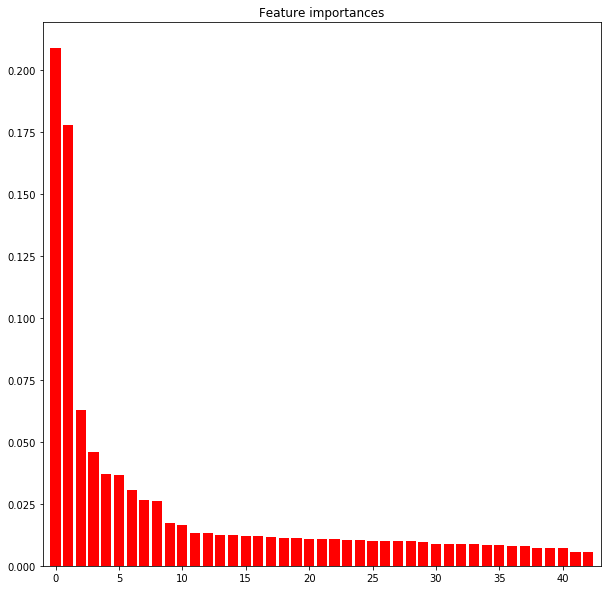

In [8]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")

plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
# dropArray = []
# for f in range(X.shape[1]):
#     if importances[indices[f]] < 0.004: 
#         dropArray.append(X.columns[indices[f]])

# data.shape

In [10]:
# print(dropArray)

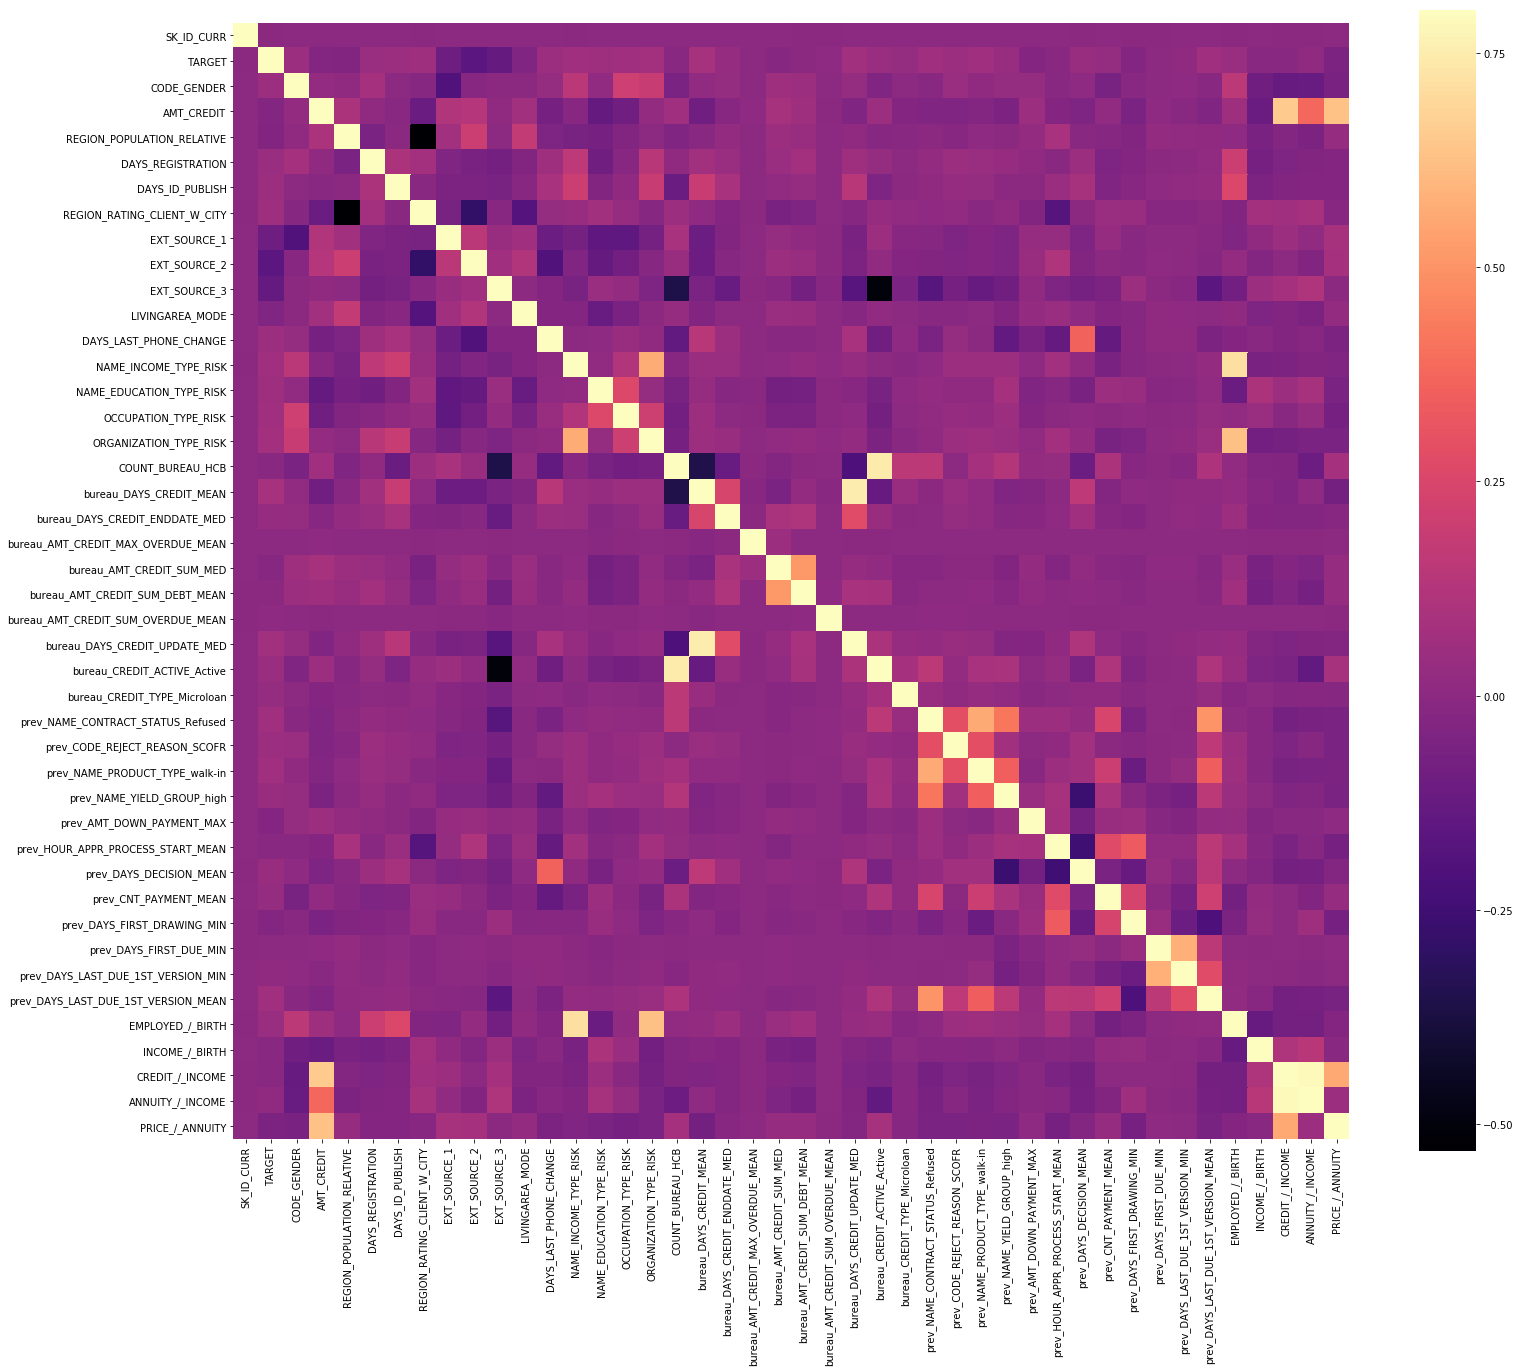

In [11]:
corr = data.corr()
plt.figure(figsize=(25, 21))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [12]:
data.to_csv('app_train_pred_final.csv', index = False)
test.to_csv('app_test_pred_final.csv', index = False)